In [1]:
#Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("h1b_kaggle_clean.csv",index_col=0)

/Users/jkyung/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
#let's start by seeing the different case status of the h1b visa
df.CASE_STATUS.unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

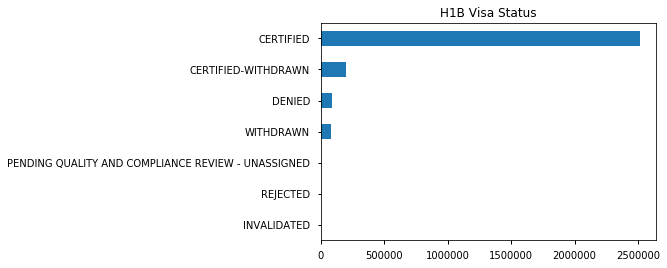

In [4]:
#Graph a bar plot to see in general how many cases were in each category
sns.set_context("notebook")
plt.title('H1B Visa Status')
df.CASE_STATUS.value_counts().sort_values().plot(kind='barh')
plt.show()

In [5]:
#How many companies are in this analysis? job titles? occupations?
print("Companies:", len(df.EMPLOYER_NAME.unique()))
print("Job Titles:", len(df.JOB_TITLE.unique()))
print("Occupations:", len(df.SOC_NAME.unique()))

Companies: 214976
Job Titles: 275476
Occupations: 1523


In [6]:
#What are some of the companies?
df.EMPLOYER_NAME.unique()

array(['UNIVERSITY OF MICHIGAN', 'GOODMAN NETWORKS, INC.',
       'PORTS AMERICA GROUP, INC.', ...,
       'ELEGANT SUPER STORES CORPORATE CORP (HDQTRS)',
       'TELSEY CAPITAL GROUP LLC', 'J. LOGAN INTERIORS'], dtype=object)

In [7]:
#How about the top 20 firms who are able to certify h1b visas?
df_cert = df[df['CASE_STATUS'].isin(['CERTIFIED'])]
df_cert.EMPLOYER_NAME.value_counts().sort_values(ascending=False).head(20)

INFOSYS LIMITED                                    129609
TATA CONSULTANCY SERVICES LIMITED                   63801
WIPRO LIMITED                                       41190
DELOITTE CONSULTING LLP                             35382
ACCENTURE LLP                                       32697
IBM INDIA PRIVATE LIMITED                           27291
MICROSOFT CORPORATION                               22311
HCL AMERICA, INC.                                   22055
ERNST & YOUNG U.S. LLP                              17739
CAPGEMINI AMERICA INC                               15863
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     15065
LARSEN & TOUBRO INFOTECH LIMITED                    13659
GOOGLE INC.                                         12320
IGATE TECHNOLOGIES INC.                             11850
TECH MAHINDRA (AMERICAS),INC.                       10525
INTEL CORPORATION                                   10116
IBM CORPORATION                                      9458
DELOITTE & TOU

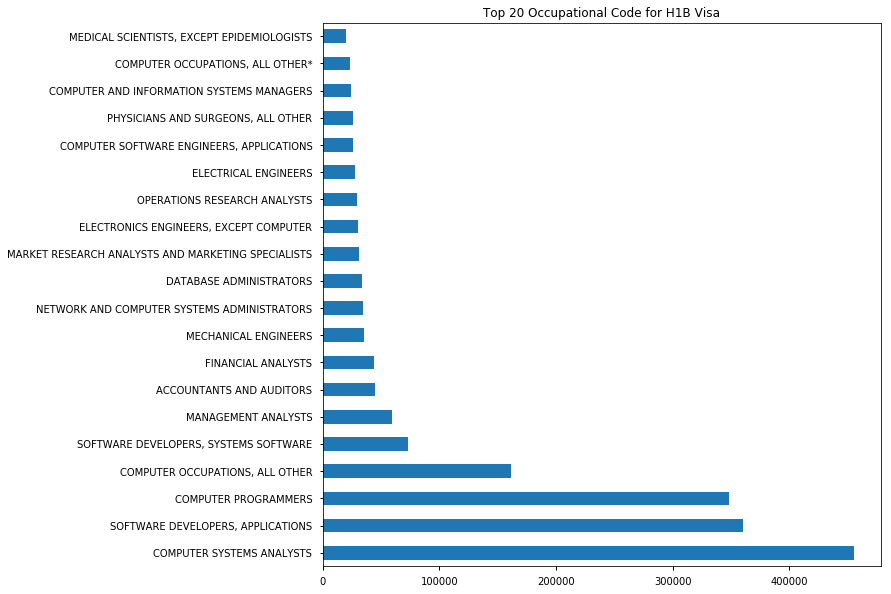

In [8]:
#What about the top occupational codes?
sns.set_context("notebook")
plt.figure(figsize=(10,10))
plt.title('Top 20 Occupational Code for H1B Visa')
df_cert.SOC_NAME.value_counts().sort_values(ascending=False).head(20).plot(kind='barh')
plt.show()

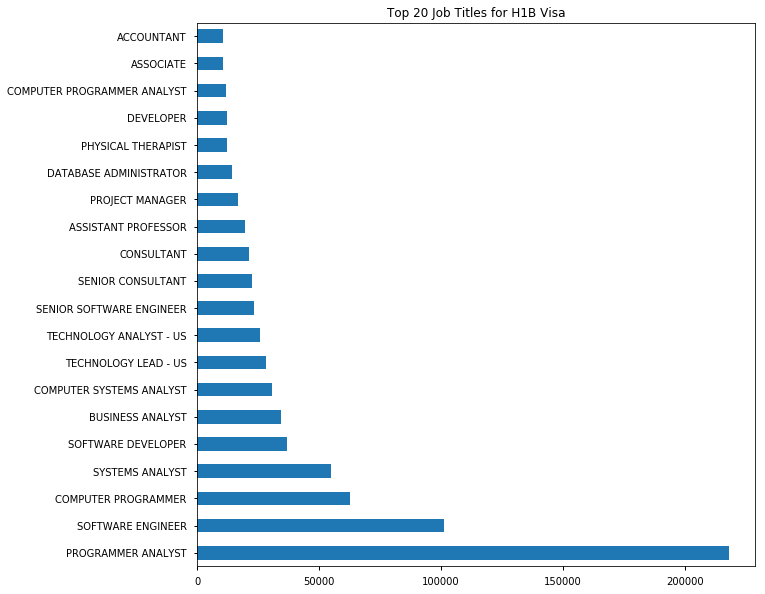

In [9]:
#How about top job titles?
sns.set_context("notebook")
plt.figure(figsize=(10,10))
plt.title('Top 20 Job Titles for H1B Visa')
df_cert.JOB_TITLE.value_counts().sort_values(ascending=False).head(20).plot(kind='barh')
plt.show()

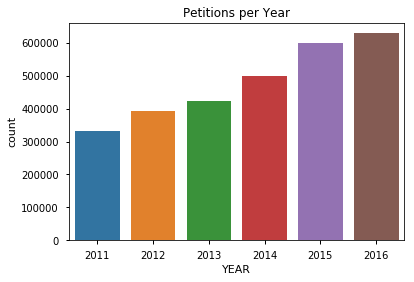

In [10]:
#How many applications were there per year?
sns.set_context("notebook",font_scale=1.0)
plt.title('Petitions per Year')
sns.countplot(df['YEAR'])
plt.show()

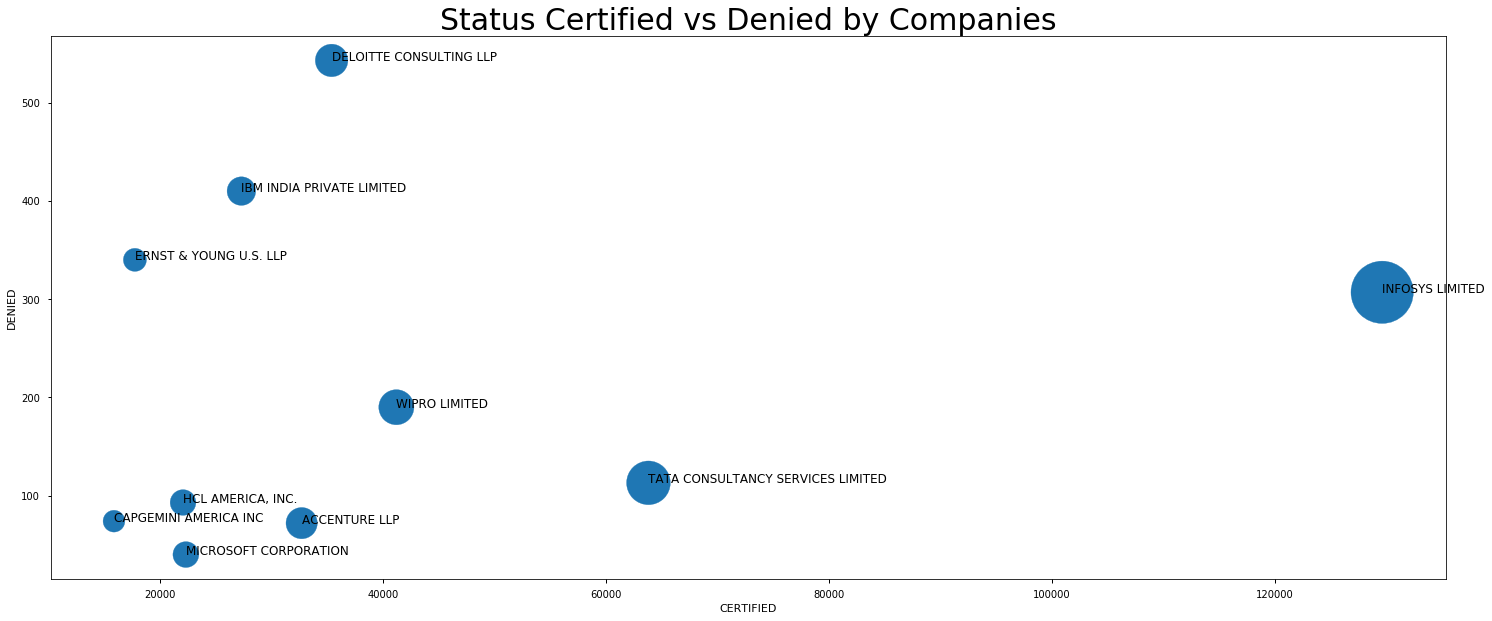

In [11]:
# Let's see which companies had the most applications certified versus denied.
comp_den=df[df['CASE_STATUS'].isin(['CERTIFIED','DENIED'])]
comp_den=comp_den[comp_den['EMPLOYER_NAME'].isin(comp_den['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)[:10].index)]
comp_den=comp_den.groupby(['EMPLOYER_NAME','CASE_STATUS'])['JOB_TITLE'].count().reset_index()
comp_den=comp_den.pivot('EMPLOYER_NAME','CASE_STATUS','JOB_TITLE')
plt.figure(figsize=(25,10))
plt.scatter('CERTIFIED','DENIED',data=comp_den,s=comp_den['CERTIFIED']*0.03)
for i in range(comp_den.shape[0]):
    plt.text(comp_den['CERTIFIED'].values[i],comp_den['DENIED'].values[i],s=comp_den.index[i])
plt.title('Status Certified vs Denied by Companies',size=30)
plt.xlabel('CERTIFIED')
plt.ylabel('DENIED')
plt.show()

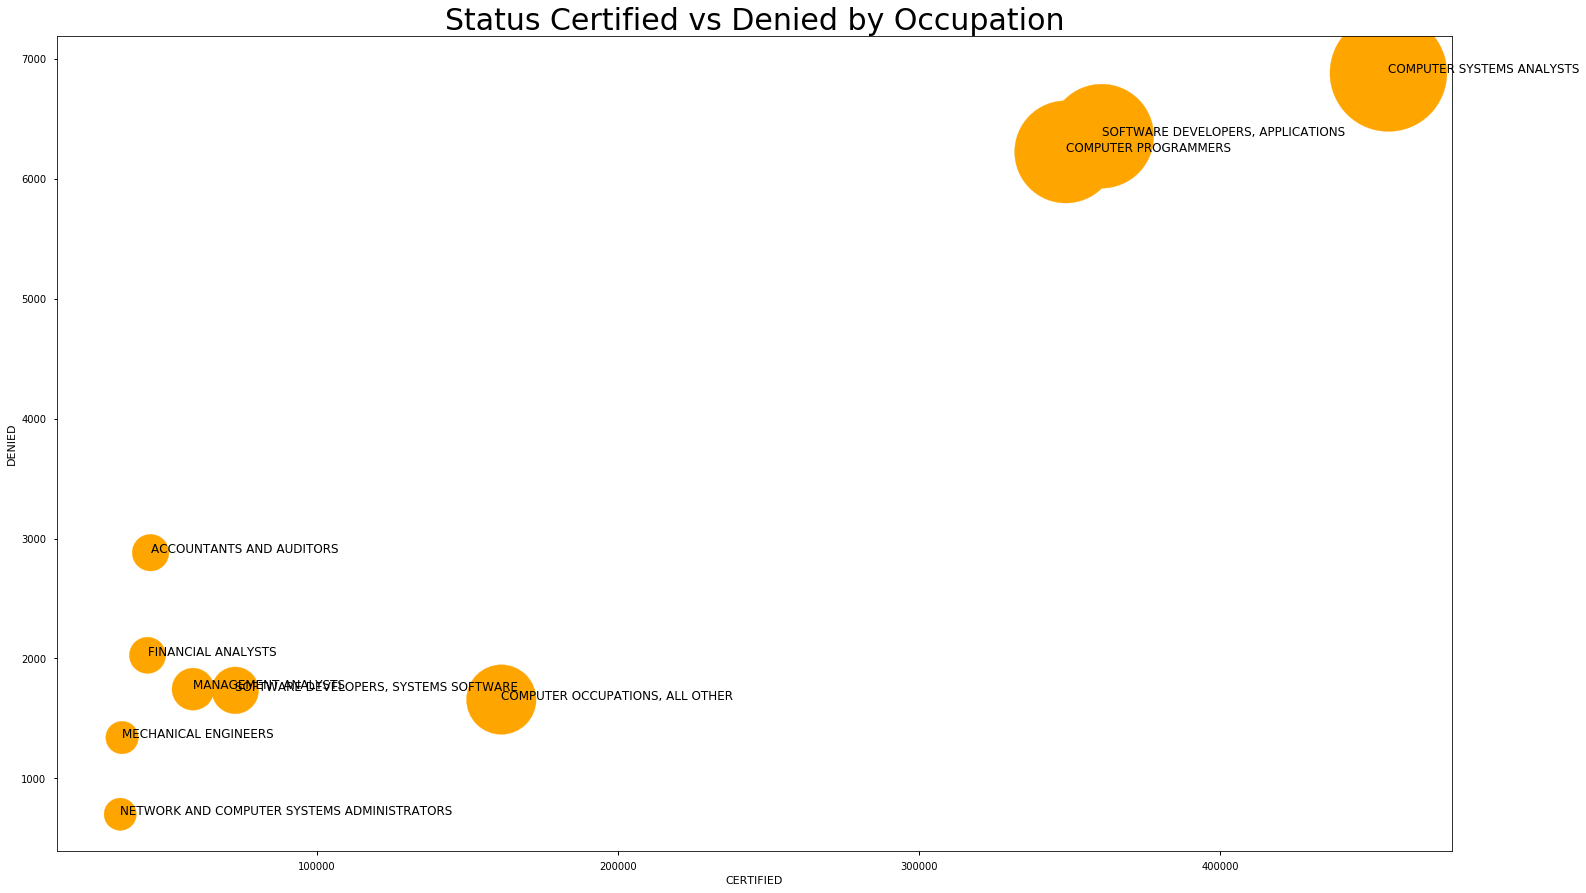

In [12]:
# How about which occupation instead?
occ_den=df[df['CASE_STATUS'].isin(['CERTIFIED','DENIED'])]
occ_den=occ_den[occ_den['SOC_NAME'].isin(occ_den['SOC_NAME'].value_counts().sort_values(ascending=False)[:10].index)]
occ_den=occ_den.groupby(['SOC_NAME','CASE_STATUS'])['JOB_TITLE'].count().reset_index()
occ_den=occ_den.pivot('SOC_NAME','CASE_STATUS','JOB_TITLE')
plt.figure(figsize=(25,15))
plt.scatter('CERTIFIED','DENIED',data=occ_den,s=occ_den['CERTIFIED']*.03,c='orange')
for i in range(comp_den.shape[0]):
    plt.text(occ_den['CERTIFIED'].values[i],occ_den['DENIED'].values[i],s=occ_den.index[i])
plt.title('Status Certified vs Denied by Occupation',size=30)
plt.xlabel('CERTIFIED')
plt.ylabel('DENIED')
plt.show()

In [13]:
# Moving onto salary, let's see what we can find.
df.PREVAILING_WAGE.describe()

count    2.877742e+06
mean     1.427362e+05
std      3.340458e+06
min      1.516000e+01
25%      5.460000e+04
50%      6.512500e+04
75%      8.151500e+04
max      1.007814e+09
Name: PREVAILING_WAGE, dtype: float64

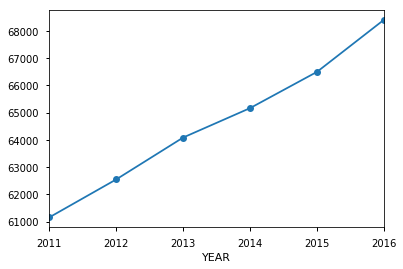

In [14]:
# will bin low, med, high as < 33%, in between, and >= 67% percentiles
summary = np.percentile(df.PREVAILING_WAGE, [33, 67])

low_wage = df[df.PREVAILING_WAGE < summary[0]]
med_wage = df[(df.PREVAILING_WAGE >= summary[0]) & (df.PREVAILING_WAGE < summary[1])]
high_wage = df[df.PREVAILING_WAGE >= summary[1]]

# plot median over the years; can see increasing median wages as time goes by.
df[df['PREVAILING_WAGE']<1000000000].groupby('YEAR')['PREVAILING_WAGE'].median().plot(marker='o')
plt.show()

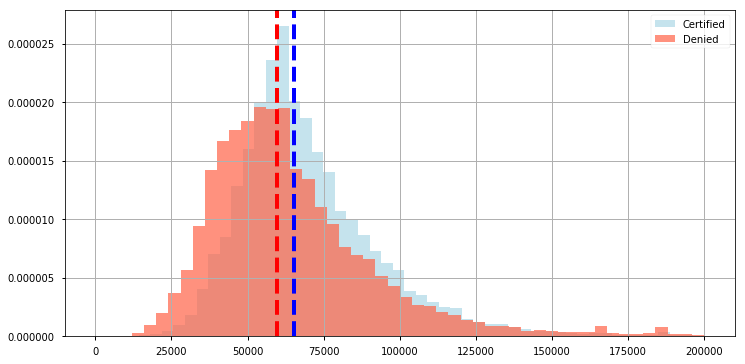

In [15]:
#data was really skewed to the right, so limit the wage to see the distribution better
plt.figure(figsize=(12,6))
df[(df['PREVAILING_WAGE']<200000)&(df['CASE_STATUS']=='CERTIFIED')].PREVAILING_WAGE.hist(bins=50, color="lightblue", alpha=0.7, label='Certified', normed=True)
plt.axvline(df[(df['PREVAILING_WAGE']<=200000)&(df['CASE_STATUS']=='CERTIFIED')].PREVAILING_WAGE.median(), color='blue', linestyle='dashed', linewidth=4)
df[(df['PREVAILING_WAGE']<200000)&(df['CASE_STATUS']=='DENIED')].PREVAILING_WAGE.hist(bins=50,color="tomato", alpha=0.7, label='Denied', normed=True)
plt.axvline(df[(df['PREVAILING_WAGE']<=200000)&(df['CASE_STATUS']=='DENIED')].PREVAILING_WAGE.median(), color='red', linestyle='dashed', linewidth=4)
plt.legend()
plt.show()
# Looks like there are not much difference between salaries.

In [16]:
# Since we have lat/lon details, we can also map out different information. Import necessary packages.
import folium
from folium import plugins

m = folium.Map(location=[48, -102], tiles='CartoDB dark_matter',zoom_start=3)

applications = plugins.MarkerCluster().add_to(m)

# Let's first check Denied applications and where that is most prevalent.
df_den = df[df['CASE_STATUS'] == "DENIED"][0:1800]
# Couldn't map all data points, maps up to 1800.

for lat, lng, label, in zip(df_den['lat'], df_den['lon'], df_den['CASE_STATUS']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(applications)

m

In [17]:
# Repeat but with certified applications.
m2 = folium.Map(location=[48, -102], tiles='CartoDB dark_matter',zoom_start=3)

applications = plugins.MarkerCluster().add_to(m2)

df_cert = df[df['CASE_STATUS'] == "CERTIFIED"][0:1800]

for lat, lng, label, in zip(df_cert['lat'], df_cert['lon'], df_cert['CASE_STATUS']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(applications)

m2

In [18]:
# Finally Let's check with the top occupation which was 'computer systems analysts'
m3 = folium.Map(location=[48, -102], tiles='CartoDB dark_matter',zoom_start=3)

applications = plugins.MarkerCluster().add_to(m3)

df_csa = df[(df['SOC_NAME'].str.contains('COMPUTER SYSTEMS ANALYSTS'))&(df['CASE_STATUS'] == 'CERTIFIED')][0:1800]

for lat, lng, label, in zip(df_csa['lat'], df_csa['lon'], df_csa['SOC_NAME']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(applications)

m3

In [20]:
comsysana=df[(df['SOC_NAME'].str.contains('COMPUTER SYSTEMS ANALYSTS'))&(df['CASE_STATUS'] == 'CERTIFIED')]
print(len(comsysana['SOC_NAME']))
print(1800/len(comsysana['SOC_NAME']))
#not even capturing a percent of the population... need a better method = Chloropeths

457419
0.003935122939799178


In [42]:
df['Total'] = df.groupby('STATE')['STATE'].transform('count')
df_us = df.groupby('STATE').sum()
df_us.reset_index(inplace=True)
df_us.loc[:,'Total']=df_us['Total']/np.max(df_us['Total'])*100
df_us.loc[:,'STATE'] = [x.title() for x in df_us.STATE]

In [43]:
# Instead of clustering, we can take a look at it with chloropeths also.
import json

us_geo = r'us-states.json' # geojson file

us_map = folium.Map(location=[48, -102], zoom_start=3, tiles='Mapbox Bright')

# generate choropleth map using the total applications in each state
us_map.choropleth(
    geo_data=us_geo,
    data=df_us,
    columns=['STATE', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Applications for H1B Visa'
)

us_map

In [40]:
df_den = df[df['CASE_STATUS'] == 'DENIED']
df_den['Total'] = df_den.groupby('STATE')['STATE'].transform('count')
df_us2 = df_den.groupby('STATE').sum()
df_us2.reset_index(inplace=True)
df_us2.loc[:,'Total']=df_us2['Total']/np.max(df_us2['Total'])*100
df_us2.loc[:,'STATE'] = [x.title() for x in df_us2.STATE]

/Users/jkyung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
us_map2 = folium.Map(location=[48, -102], zoom_start=3, tiles='Mapbox Bright')

# generate choropleth map using the total applications in each state
us_map2.choropleth(
    geo_data=us_geo,
    data=df_us2,
    columns=['STATE', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Applications for H1B Visa'
)

us_map2

In [39]:
df_cert = df[df['CASE_STATUS'] == 'CERTIFIED']
df_cert['Total'] = df_cert.groupby('STATE')['STATE'].transform('count')
df_us3 = df_cert.groupby('STATE').sum()
df_us3.reset_index(inplace=True)
df_us3.loc[:,'Total']=df_us3['Total']/np.max(df_us3['Total'])*100
df_us3.loc[:,'STATE'] = [x.title() for x in df_us3.STATE]

/Users/jkyung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
us_map3 = folium.Map(location=[48, -102], zoom_start=3, tiles='Mapbox Bright')

# generate choropleth map using the total applications in each state
us_map3.choropleth(
    geo_data=us_geo,
    data=df_us3,
    columns=['STATE', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Applications for H1B Visa'
)

us_map3

In [47]:
df_csa = df[(df['SOC_NAME'].str.contains('COMPUTER SYSTEMS ANALYSTS'))&(df['CASE_STATUS'] == 'CERTIFIED')]
df_csa['Total'] = df_csa.groupby('STATE')['STATE'].transform('count')
df_us4 = df_csa.groupby('STATE').sum()
df_us4.reset_index(inplace=True)
df_us4.loc[:,'Total']=df_us4['Total']/np.max(df_us4['Total'])*100
df_us4.loc[:,'STATE'] = [x.title() for x in df_us4.STATE]

/Users/jkyung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
us_map4 = folium.Map(location=[48, -102], zoom_start=3, tiles='Mapbox Bright')

# generate choropleth map using the total applications in each state
us_map4.choropleth(
    geo_data=us_geo,
    data=df_us4,
    columns=['STATE', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Applications for H1B Visa'
)

us_map4

In [ ]:
# Looks like in all three chloropeths, California has the most Certified, Denied, and Computer Systems Analysts